# Note sur les cartes cognitives

V2, après nouvelles enquêtes VBO et reprise du thésaurus.


## Notes sur les données

### A l'usage du producteur

Pour faciliter le traitement automatique, assurer la qualité des données

- apostrophe avant date
- espace/majuscules surperflues : respecter l'orthographe, supprimer les articles inutiles, forme fléchies
  - penser à _un dictionnaire_
- colonnes duppliquées (calcul si besoin)
- colonnes de même nom
- colonnes au nom ambigu
- numéro au delà des utilisés
- pas de mise en forme en utilisant des cellules vides

### Notes techniques

- rester tant que possible sur un `DataFrame`,
  - ne pas mixer / casser la srtucture,
  - ou alors, _once and for all_ e.g., pour la liste de réponses,
- assurer la cohérence de la clef : OK (au 2022-05-31)
- gérer les libellés des questions
- la représentation des durées/ages (`ans`)

## Exploration du dataset


In [213]:
import operator as op

from collections import Counter
from statistics import fmean

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

MAX_COLS = 20
PREFIX_MINE = "Mine"
PREFIX_FUTUR = "Futur"
LABEL_MINE = "la mine et le nickel"
LABEL_FUTUR = "la mine dans le futur"
TOP_K_WORDS = 20

cols_mine = [f"{PREFIX_MINE} {i}" for i in range(1, MAX_COLS + 1)]
cols_futur = [f"{PREFIX_FUTUR} {i}" for i in range(1, MAX_COLS + 1)]


In [160]:
df_complete = pd.read_excel("../input/BDD_2022-05-31.xlsx", sheet_name="BDD", index_col="Numéro")
print("Liste des colonnes disponibles")
display(df_complete.columns)

cols_resp = [c for c in df_complete.columns if c not in cols_mine + cols_futur]

df_resp = df_complete[cols_resp]
df_resp.name = "Données personnelles"
df_mine = df_complete[cols_mine].astype("string")
df_mine.name = f"Cartes cognitives '{LABEL_MINE}'"
df_futur = df_complete[cols_futur].astype("string")
df_futur.name = f"Cartes cognitives '{LABEL_FUTUR}'"

print(f"Nombre de répondants {len(df_complete)}")
print(f"Colonnes '{LABEL_MINE}' présentes {set(cols_mine) <= set(df_complete.columns)}")
print(f"Colonnes '{LABEL_FUTUR}' présentes {set(cols_futur) <= set(df_complete.columns)}")



Liste des colonnes disponibles


Index(['Date', 'Commune d’enquête', 'Collecte directe',
       'Commentaire entretien/individu', 'Question 1', 'Question 2',
       'Question 3', 'Question 4', 'Question 5', 'Question 5.1', 'Question 6',
       'Question 7', 'Question 8', 'Question 8.1', 'Question 8.2',
       'Question 9', 'Question 10', 'Question 10.1', 'Question 11',
       'Question 12', 'Question 13', 'Question 14', 'Question 14.1', 'Mine 1',
       'Mine 2', 'Mine 3', 'Mine 4', 'Mine 5', 'Mine 6', 'Mine 7', 'Mine 8',
       'Mine 9', 'Mine 10', 'Mine 11', 'Mine 12', 'Mine 13', 'Mine 14',
       'Mine 15', 'Mine 16', 'Mine 17', 'Mine 18', 'Mine 19', 'Mine 20',
       'Futur 1', 'Futur 2', 'Futur 3', 'Futur 4', 'Futur 5', 'Futur 6',
       'Futur 7', 'Futur 8', 'Futur 9', 'Futur 10', 'Futur 11', 'Futur 12',
       'Futur 13', 'Futur 14', 'Futur 15', 'Futur 16', 'Futur 17', 'Futur 18',
       'Futur 19', 'Futur 20'],
      dtype='object')

Nombre de répondants 508
Colonnes 'la mine et le nickel' présentes True
Colonnes 'la mine dans le futur' présentes True


In [161]:
# display(df_resp.info())
display(df_resp)


,Date,Commune d’enquête,Collecte directe,Commentaire entretien/individu,Question 1,Question 2,Question 3,Question 4,Question 5,Question 5.1,...,Question 8.1,Question 8.2,Question 9,Question 10,Question 10.1,Question 11,Question 12,Question 13,Question 14,Question 14.1
Numéro,,,,,,,,,,,,,,,,,,,,,
1,2021-06-09,Thio,Oui,NaN,Non,NaN,NaN,Oui,Oui,NaN,...,Thio,Minière,59.0,Oui,Houaïlou - Nouméa,Travail (boulanger),59.0,Homme,Emile Moindou,706250
2,2021-06-09,Thio,Oui,Très bavard. Directeur du collège public.,Non,NaN,NaN,Non,Non,France (naissance),...,Thio,Minière,3.0,Non,NaN,NaN,63.0,Homme,Gilles Thollard,950598
3,2021-06-09,Thio,Oui,NaN,Non,NaN,NaN,Oui,Oui,NaN,...,Thio,Minière,35.0,Non,NaN,NaN,35.0,Femme,NaN,NaN
4,2021-06-09,Thio,Oui,NaN,Oui,Géomètre - topographe,15.0,Oui,Oui,NaN,...,Thio,Minière,52.0,Non,NaN,NaN,52.0,Homme,NaN,NaN
5,2021-06-10,Thio,Oui,NaN,Non,NaN,NaN,Oui,Oui,NaN,...,Thio,Minière,50.0,Oui,Canala,Adoption quand enfant,69.0,Femme,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,2022-03-10,Hienghène,Oui,Collègien Hienghène,Non,NaN,NaN,Non,Oui,NaN,...,Hienghène,Non minière,NaN,Non,NaN,NaN,14.0,Femme,NaN,NaN
505,2022-03-10,Hienghène,Oui,Collègien Hienghène,Non,NaN,NaN,Oui,Oui,NaN,...,Hienghène,Non minière,NaN,Non,NaN,NaN,13.0,Femme,NaN,NaN
506,2022-03-10,Hienghène,Oui,Collègien Hienghène,Non,NaN,NaN,Oui,Oui,NaN,...,Hienghène,Non minière,NaN,Oui,Nouméa,NaN,13.0,Homme,NaN,NaN


In [162]:
display(df_mine)



,Mine 1,Mine 2,Mine 3,Mine 4,Mine 5,Mine 6,Mine 7,Mine 8,Mine 9,Mine 10,Mine 11,Mine 12,Mine 13,Mine 14,Mine 15,Mine 16,Mine 17,Mine 18,Mine 19,Mine 20
Numéro,,,,,,,,,,,,,,,,,,,,
1,Pollution,Inondation,Boom,Travail,Retombée,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,Richesse,Malédiction,Travail,Destruction,Histoire,Frein,Blocage,Coutumier,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,Travail,Pollution,Plainte,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,Argent,Pollution,Nickel,Production,Nature,Réparation,Mer,Inégalité,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,Extraction,Montagne,Pollution,Mineur,Train,Diversité,Évolution,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,Caillou,Camion,Fer,Ramassage,Faire fondre le nickel,Transport,Bâteau,Construire des objets,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
505,Granite,Usine,Richesse,Epuisable,Pétrole,Cailloux,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
506,Exploitation,Richesse,Conflit,Détruit le lagon,Pollution,Argents,Vol d'argent,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [163]:
display(df_futur)

,Futur 1,Futur 2,Futur 3,Futur 4,Futur 5,Futur 6,Futur 7,Futur 8,Futur 9,Futur 10,Futur 11,Futur 12,Futur 13,Futur 14,Futur 15,Futur 16,Futur 17,Futur 18,Futur 19,Futur 20
Numéro,,,,,,,,,,,,,,,,,,,,
1,Fermeture,Usine de Doniambo,Travail,Creusage,Droit,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,Impossible,Indispensable,Gestion,Enjeu,Concurrence,Rationnalisation,Entente,Difficile,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,Rien,Après-nickel,Pollution,Activité,Épuisement,Rebondissement,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,Montagne,Poisson,Dépotoir,Répartition,Rendement,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
5,Extraction,Tradition,Repère,Action,Adaptation,Pauvre,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,Il aura plus,Pollution,Usine abandonnée,Trop exploité,Camion,Outils de travail,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
505,Epuisé,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
506,Exploitation,Destruction nature,Conflit,Destruction du lagon,Pollution,Terrain trop exploité,Destruction de notre pays,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


Quelques vérifications et indicateurs globaux

Création des dictionnaires de réponses sur les deux enquêtes

In [164]:
def get_cogmaps(df, cols):
    return {
        idx: [val.lower().strip() for val in vals.dropna().tolist()]
        for idx, vals in df[cols].astype("string").iterrows()
    }


dict_mine = get_cogmaps(df_complete, cols_mine)
dict_futur = get_cogmaps(df_complete, cols_futur)

# display(dict_mine)

for dic, lbl in ((dict_mine, LABEL_MINE), (dict_futur, LABEL_FUTUR)):
    print(f"Cartes '{lbl}'")
    print(f"\tplus longue cartes {max(len(val) for val in dic.values())}")
    print(f"\tlongueur moyenne des cartes {fmean(len(val) for val in dic.values()):.2f}")
    print(f"\tnombre total de mots énoncés {sum(len(val) for val in dic.values())}")
    print(f"\tnombre de mots énoncés différents {len(set(v for val in dic.values() for v in val))}")
    print()


Cartes 'la mine et le nickel'
	plus longue cartes 20
	longueur moyenne des cartes 7.61
	nombre total de mots énoncés 3865
	nombre de mots énoncés différents 938

Cartes 'la mine dans le futur'
	plus longue cartes 18
	longueur moyenne des cartes 4.68
	nombre total de mots énoncés 2376
	nombre de mots énoncés différents 914



In [165]:


for dic, lbl in ((dict_mine, LABEL_MINE), (dict_futur, LABEL_FUTUR)):
    all_words = Counter(w for l in dic.values() for w in l)
    print(f"Cartes '{lbl}' : {len(all_words)} mots. Top {TOP_K_WORDS}, toutes positions confondues :")
    display(all_words.most_common(TOP_K_WORDS))


Cartes 'la mine et le nickel' : 938 mots. Top 20, toutes positions confondues :


[
    ('nickel', 189),
    ('pollution', 182),
    ('économie', 112),
    ('camion', 104),
    ('travail', 100),
    ('environnement', 100),
    ('emploi', 97),
    ('usine', 89),
    ('richesse', 74),
    ('argent', 74),
    ('montagne', 74),
    ('terre', 73),
    ('exploitation', 65),
    ('minerai', 65),
    ('destruction', 60),
    ('ressource', 56),
    ('sln', 54),
    ('conflit', 50),
    ('déforestation', 41),
    ('caillou', 38)
]

Cartes 'la mine dans le futur' : 914 mots. Top 20, toutes positions confondues :


[
    ('pollution', 122),
    ('économie', 54),
    ('environnement', 50),
    ('emploi', 49),
    ('ressource', 43),
    ('destruction', 32),
    ('épuisement', 31),
    ('conflit', 28),
    ('richesse', 26),
    ('technologie', 24),
    ('développement', 24),
    ('montagne', 22),
    ('travail', 21),
    ('impact', 21),
    ('reboisement', 20),
    ('disparition', 20),
    ('argent', 18),
    ('fin', 18),
    ('exploitation', 18),
    ('déforestation', 17)
]

Longueur des cartes et leur histogramme

Répartitions des longueurs des cartes


<Figure size 432x288 with 1 Axes>

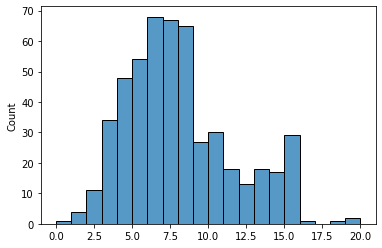

<Figure size 432x288 with 1 Axes>

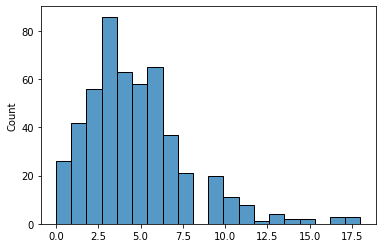

In [166]:
def get_n_words(dic, n:int):
    """Mot de la position n"""
    return [vals[n] for vals in dic.values() if n < len(vals) ]

# for i in range(20):
#     n_words = get_n_words(i)
#     print(f"{len(n_words)} in pos {i}")

# pd.DataFrame.from_dict(data={idx:len(vals) for idx, vals in dict_mine.items()}, orient="index", columns=["Length"])
print("Répartitions des longueurs des cartes")
sns.histplot([len(vals) for vals in dict_mine.values()], bins=20)
plt.show()
sns.histplot([len(vals) for vals in dict_futur.values()], bins=20)
plt.show()

## Quelques indicateurs sur les profils des répondants

On commence par récupérer les libellés des questions

In [167]:
df_questions = pd.read_excel("../input/BDD_2022-05-31.xlsx", sheet_name="Questions", parse_dates=False).astype({"Question" : "string", "Libellé":"string"})
# df_questions.info()
display(df_questions)
print(f"Toutes les questions présentes {set(df_questions['Question']) <= set(df_resp.columns)}")
questions_labels = df_questions.set_index("Question").to_dict()["Libellé"] #orient="series"

,Question,Libellé
0,Question 1,Travaillez-vous ou avez travaillez pour l’indu...
1,Question 2,"Si oui, quel(s) étai(en)t votre/vos poste(s) ?"
2,Question 3,Depuis combien de temps travaillez-vous ou pen...
3,Question 4,Un membre de votre famille travaille t’il ou a...
4,Question 5,Avez-vous toujours vécu en Nouvelle-Calédonie ?
5,Question 5.1,"Si non, d’où venez-vous ?"
6,Question 6,"Si non, depuis combien de temps vivez-vous en ..."
7,Question 7,"Si non, pourquoi vous êtes vous installé(e) en..."
8,Question 8,Où habitez-vous ? (Le plus précis possible san...
9,Question 8.1,Commune de résidence.


Toutes les questions présentes True


In [168]:
print(questions_labels["Question 1"])
print(questions_labels["Question 4"])
df_complete.value_counts(subset=["Question 1", "Question 4"], sort = False)

Travaillez-vous ou avez travaillez pour l’industrie minière ou métallurgique ?
Un membre de votre famille travaille t’il ou a t’il travaillé pour cette industrie ?


Question 1  Question 4
Non         Non           136
            Oui           300
Oui         Non            12
            Oui            55
dtype: int64

Histogramme des ages des répondants


<AxesSubplot:xlabel='Question 12', ylabel='Count'>

<Figure size 432x288 with 1 Axes>

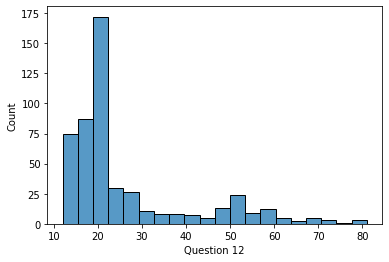

In [169]:
print("Histogramme des ages des répondants")
sns.histplot(df_resp["Question 12"], bins=20)

## Mots les plus communs

On va segmenter les donnéées en _populations_ (e.g., "moins de 26 ans", "mineur", etc.) selon les attributs et générer un tableau avec :

- en ligne tous les mots énoncés dans les cartes "la mine"
- en colonne, les population, avec pour chacune :
  - le nombre de fois où le mot a été énoncé par les membres de cette population
  - le nombre de fois "théorique" où le mot serait annoncé si il y avait indépendance des énonciations entre les populations
  - le % de fois où un membre de la population a énoncé le mot

In [263]:
LABEL_TOTAL = "Énonciations"
all_words = Counter(w for l in dict_mine.values() for w in l)
df_population = pd.DataFrame(index=list(all_words.keys()))
df_population[("*", LABEL_TOTAL)] = all_words.values()
df_population.sort_values(("*", LABEL_TOTAL), key=op.neg, inplace=True)

CLEF_NB = "Nb."


def add_population(filtre, name):
    cg = get_cogmaps(df_mine[filtre], cols_mine)
    c = Counter(w for l in cg.values() for w in l)
    print(f"Ajout de la colonne '{name}', {len(cg)} répondants, {c.total()} énonciations")

    df_population[(name, CLEF_NB)] = pd.Series(c)
    df_population[(name, CLEF_NB)].fillna(0, inplace=True)
    df_population[(name, CLEF_NB)] = df_population[(name, CLEF_NB)].astype(int)
    # df_population[f"{name} (% des mots)"] = round(100 * pd.Series(c) / c.total(),2)
    # ici en % ** des répondants**
    df_population[(name, "Nb. th.")] = round(df_population[("*", LABEL_TOTAL)] * len(cg) / len(df_mine), 2)
    df_population[(name, "Nb. (%)")] = round(100 * pd.Series(c) / len(cg), 2)


moins_de_26_ans = df_resp["Question 12"] < 26
add_population(moins_de_26_ans, "Age < 26")
add_population(~moins_de_26_ans, "Age >= 26")

travaille_dans_la_mine = df_resp["Question 1"] == "Oui"
add_population(travaille_dans_la_mine, "Travaille dans la mine")
add_population(~travaille_dans_la_mine, "Ne travaille PAS dans la mine")

famille_dans_la_mine = df_resp["Question 4"] == "Oui"
add_population(famille_dans_la_mine, "Famille dans la mine")
add_population(~famille_dans_la_mine, "PAS de famille dans la mine")


df_population.fillna(0.0, inplace=True)
df_population.columns = pd.MultiIndex.from_tuples(df_population.columns)

THRESHOLD = 10
display(df_population[df_population[("*", LABEL_TOTAL)] >= THRESHOLD])


Ajout de la colonne 'Age < 26', 364 répondants, 2837 énonciations
Ajout de la colonne 'Age >= 26', 144 répondants, 1028 énonciations
Ajout de la colonne 'Travaille dans la mine', 68 répondants, 520 énonciations
Ajout de la colonne 'Ne travaille PAS dans la mine', 440 répondants, 3345 énonciations
Ajout de la colonne 'Famille dans la mine', 355 répondants, 2765 énonciations
Ajout de la colonne 'PAS de famille dans la mine', 153 répondants, 1100 énonciations


* 
 Age < 26 
 Age >= 26 
 Travaille dans la mine 
 Ne travaille PAS dans la mine 
 Famille dans la mine 
 PAS de famille dans la mine 
 
 
 
 Énonciations 
 Nb. 
 Nb. th. 
 Nb. (%) 
 Nb. 
 Nb. th. 
 Nb. (%) 
 Nb. 
 Nb. th. 
 Nb. (%) 
 Nb. 
 Nb. th. 
 Nb. (%) 
 Nb. 
 Nb. th. 
 Nb. (%) 
 Nb. 
 Nb. th. 
 Nb. (%) 
 
 
 
 
 nickel 
 189 
 151 
 135.43 
 41.48 
 38 
 53.57 
 26.39 
 23 
 25.30 
 33.82 
 166 
 163.70 
 37.73 
 129 
 132.08 
 36.34 
 60 
 56.92 
 39.22 
 
 
 pollution 
 182 
 118 
 130.41 
 32.42 
 64 
 51.59 
 44.44 
 28 
 24.36 
 41.18 
 154 
 157.64 
 35.00 
 129 
 127.19 
 36.34 
 53 
 54.81 
 34.64 
 
 
 économie 
 112 
 78 
 80.25 
 21.43 
 34 
 31.75 
 23.61 
 18 
 14.99 
 26.47 
 94 
 97.01 
 21.36 
 81 
 78.27 
 22.82 
 31 
 33.73 
 20.26 
 
 
 camion 
 104 
 92 
 74.52 
 25.27 
 12 
 29.48 
 8.33 
 11 
 13.92 
 16.18 
 93 
 90.08 
 21.14 
 80 
 72.68 
 22.54 
 24 
 31.32 
 15.69 
 
 
 environnement 
 100 
 60 
 71.65 
 16.48 
 40 
 28.35 
 27.78 
 22 
 13.39 
 32.35 
 78 
 86.61 
 17.73 
 75 
 69.88 
 21.13 
 25 
 30.12 
 16.34 
 
 
 travail 
 100 
 74 
 71.65 
 20.33 
 26 
 28.35 
 18.06 
 15 
 13.39 
 22.06 
 85 
 86.61 
 19.32 
 71 
 69.88 
 20.00 
 29 
 30.12 
 18.95 
 
 
 emploi 
 97 
 68 
 69.50 
 18.68 
 29 
 27.50 
 20.14 
 17 
 12.98 
 25.00 
 80 
 84.02 
 18.18 
 71 
 67.79 
 20.00 
 26 
 29.21 
 16.99 
 
 
 usine 
 89 
 83 
 63.77 
 22.80 
 6 
 25.23 
 4.17 
 2 
 11.91 
 2.94 
 87 
 77.09 
 19.77 
 71 
 62.19 
 20.00 
 18 
 26.81 
 11.76 
 
 
 richesse 
 74 
 48 
 53.02 
 13.19 
 26 
 20.98 
 18.06 
 11 
 9.91 
 16.18 
 63 
 64.09 
 14.32 
 51 
 51.71 
 14.37 
 23 
 22.29 
 15.03 
 
 
 argent 
 74 
 42 
 53.02 
 11.54 
 32 
 20.98 
 22.22 
 18 
 9.91 
 26.47 
 56 
 64.09 
 12.73 
 58 
 51.71 
 16.34 
 16 
 22.29 
 10.46 
 
 
 montagne 
 74 
 58 
 53.02 
 15.93 
 16 
 20.98 
 11.11 
 8 
 9.91 
 11.76 
 66 
 64.09 
 15.00 
 55 
 51.71 
 15.49 
 19 
 22.29 
 12.42 
 
 
 terre 
 73 
 60 
 52.31 
 16.48 
 13 
 20.69 
 9.03 
 6 
 9.77 
 8.82 
 67 
 63.23 
 15.23 
 52 
 51.01 
 14.65 
 21 
 21.99 
 13.73 
 
 
 exploitation 
 65 
 59 
 46.57 
 16.21 
 6 
 18.43 
 4.17 
 3 
 8.70 
 4.41 
 62 
 56.30 
 14.09 
 45 
 45.42 
 12.68 
 20 
 19.58 
 13.07 
 
 
 minerai 
 65 
 59 
 46.57 
 16.21 
 6 
 18.43 
 4.17 
 6 
 8.70 
 8.82 
 59 
 56.30 
 13.41 
 50 
 45.42 
 14.08 
 15 
 19.58 
 9.80 
 
 
 destruction 
 60 
 33 
 42.99 
 9.07 
 27 
 17.01 
 18.75 
 7 
 8.03 
 10.29 
 53 
 51.97 
 12.05 
 44 
 41.93 
 12.39 
 16 
 18.07 
 10.46 
 
 
 ressource 
 56 
 48 
 40.13 
 13.19 
 8 
 15.87 
 5.56 
 7 
 7.50 
 10.29 
 49 
 48.50 
 11.14 
 40 
 39.13 
 11.27 
 16 
 16.87 
 10.46 
 
 
 sln 
 54 
 46 
 38.69 
 12.64 
 8 
 15.31 
 5.56 
 2 
 7.23 
 2.94 
 52 
 46.77 
 11.82 
 39 
 37.74 
 10.99 
 15 
 16.26 
 9.80 
 
 
 conflit 
 50 
 40 
 35.83 
 10.99 
 10 
 14.17 
 6.94 
 3 
 6.69 
 4.41 
 47 
 43.31 
 10.68 
 38 
 34.94 
 10.70 
 12 
 15.06 
 7.84 
 
 
 déforestation 
 41 
 34 
 29.38 
 9.34 
 7 
 11.62 
 4.86 
 5 
 5.49 
 7.35 
 36 
 35.51 
 8.18 
 26 
 28.65 
 7.32 
 15 
 12.35 
 9.80 
 
 
 caillou 
 38 
 36 
 27.23 
 9.89 
 2 
 10.77 
 1.39 
 3 
 5.09 
 4.41 
 35 
 32.91 
 7.95 
 27 
 26.56 
 7.61 
 11 
 11.44 
 7.19 
 
 
 exportation 
 31 
 29 
 22.21 
 7.97 
 2 
 8.79 
 1.39 
 3 
 4.15 
 4.41 
 28 
 26.85 
 6.36 
 26 
 21.66 
 7.32 
 5 
 9.34 
 3.27 
 
 
 terre rouge 
 30 
 25 
 21.50 
 6.87 
 5 
 8.50 
 3.47 
 3 
 4.02 
 4.41 
 27 
 25.98 
 6.14 
 23 
 20.96 
 6.48 
 7 
 9.04 
 4.58 
 
 
 développement 
 30 
 21 
 21.50 
 5.77 
 9 
 8.50 
 6.25 
 6 
 4.02 
 8.82 
 24 
 25.98 
 5.45 
 25 
 20.96 
 7.04 
 5 
 9.04 
 3.27 
 
 
 nature 
 28 
 10 
 20.06 
 2.75 
 18 
 7.94 
 12.50 
 5 
 3.75 
 7.35 
 23 
 24.25 
 5.23 
 24 
 19.57 
 6.76 
 4 
 8.43 
 2.61 
 
 
 métal 
 24 
 23 
 17.20 
 6.32 
 1 
 6.80 
 0.69 
 2 
 3.21 
 2.94 
 22 
 20.79 
 5.00 
 15 
 16.77 
 4.23 
 9 
 7.23 
 5.88 
 
 
 extraction 
 22 
 18 
 15.76 
 4.95 
 4 
 6.24 
 2.78 
 3 
 2.94 
 4.41 
 19 
 19.06 
 4.32 
 14 
 15.37 
 3.94 
 8 
 6.63 
 5

In [ ]:

df_population.to_excel("analyse_par_population.xlsx")
